In [9]:
!pwd

/Users/nico/panoseti/panoseti-software/anomaly-detection


In [10]:
%load_ext autoreload
%autoreload 2

import sys, os
import logging, typing
from torchvision import transforms

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import torch
from tqdm import tqdm

sys.path.append('../util')
import panoseti_file_interfaces as pfi
import pff
from vae_model import *
from ph_dataset import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
ph_dataset_config = {
    "max_ph_frames": 20_000,
    "observing_runs": [
        {
            "data_dir": './test_data',
            "run_dir": 'obs_Lick.start_2023-07-14T04:46:21Z.runtype_sci-obs.pffd',
            "module_ids": 'all',
        },
        {
            "data_dir": './test_data',
            "run_dir": 'obs_Lick.start_2023-08-15T07:15:50Z.runtype_sci-obs.pffd',
            "module_ids": 'all',
        },
        {
            "data_dir": './test_data',
            "run_dir": 'obs_Lick.start_2023-09-14T04:25:43Z.runtype_sci-obs.pffd',
            "module_ids": 'all',
        },
        {
            "data_dir": './test_data',
            "run_dir": 'obs_Lick.start_2023-10-12T04:28:34Z.runtype_eng-test.pffd',
            "module_ids": 'all',
        },
        {
            "data_dir": './test_data',
            "run_dir": 'obs_Lick.start_2024-05-24T04:37:30Z.runtype_sci-data.pffd',
            "module_ids": 'all',
        },
        {
            "data_dir": './test_data',
            "run_dir": 'obs_Lick.start_2024-07-25T04:34:06Z.runtype_sci-data.pffd',
            "module_ids": 'all',
        },
    ]
}

Computing average PH image


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:03<00:00, 6657.34ph_frames/s]


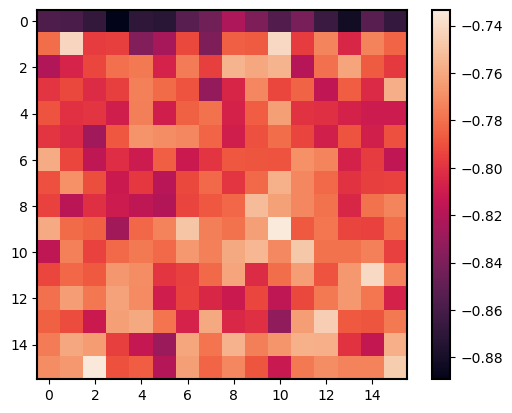

In [23]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ConvertImageDtype(torch.float),
])

ph_dataset = PulseHeightDataset(ph_dataset_config, transform=transform, log_level=logging.ERROR)

In [5]:
ph_dataset.reset_ph_generator()

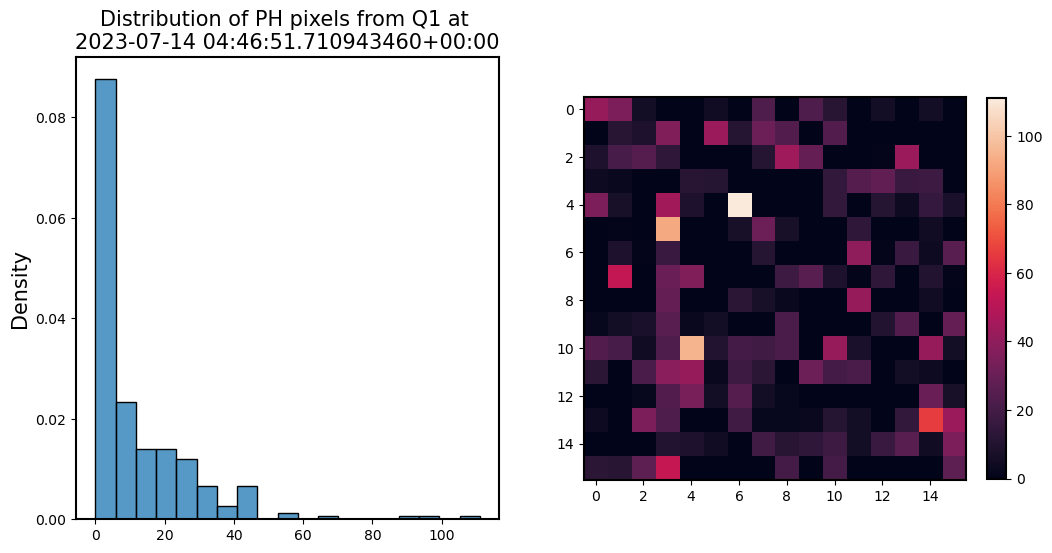

In [25]:
# PH data EDA: visualize PH image and the distribution of pixel values.
ph_data = ph_dataset.get_ph_data(0)

assert ph_data['img'] is not None
f, axs = plt.subplots(1, 2, figsize=(12, 6))
plot_ph_img(ph_data['img'], ph_data['meta'], ax=axs[1])
plot_ph_pixel_dist(ph_data['img'],  ph_data['meta'], ax=axs[0])

plt.show()

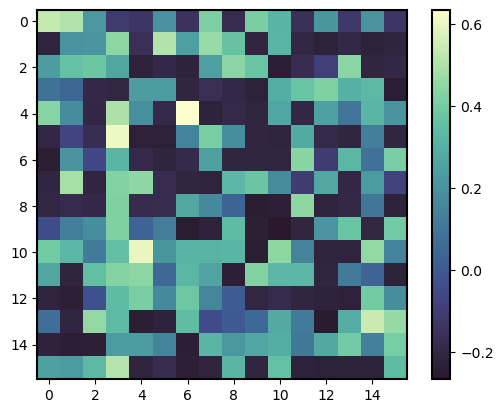

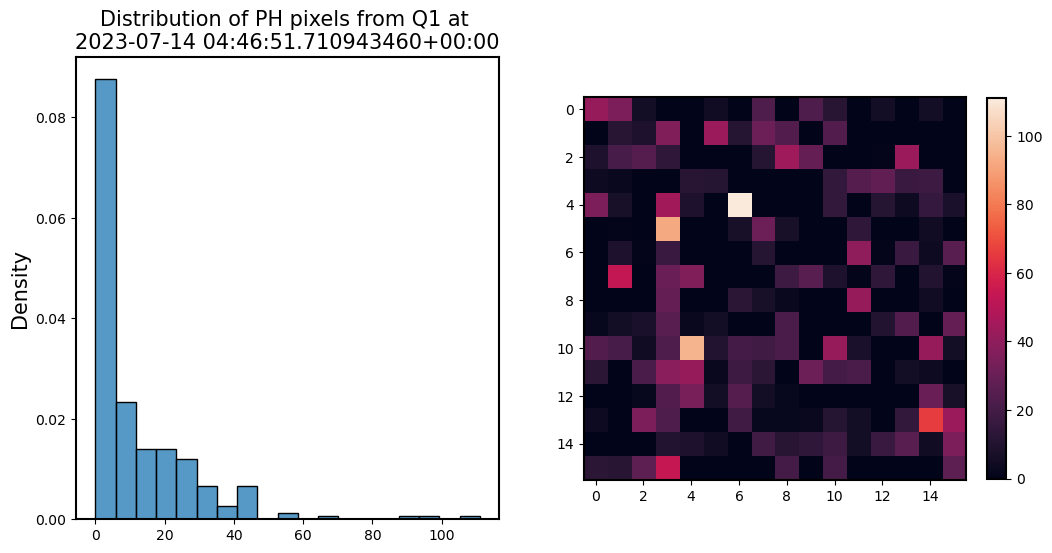

In [50]:
# PH data EDA: visualize PH image and the distribution of pixel values.
ph_dataset.reset_ph_generator()
ph_img = ph_dataset[0].numpy().squeeze(0)
s = plt.imshow(ph_img)
# plt.colorbar(s)
# plt.show()

f, axs = plt.subplots(1, 2, figsize=(12, 6))
ph_dataset.plot_ph_img(ph_img, ph_data['meta'], ax=axs[1])
ph_dataset.plot_ph_pixel_dist(ph_img,  ph_data['meta'], ax=axs[0])

plt.show()

In [7]:
x = {1: 'a', 2: 'b'}

In [8]:
x.copy()

{1: 'a', 2: 'b'}